In [ ]:
import pandas as pd
bear_data = pd.read_csv("/disk2/ksebestyen/bear_mean_pool1.csv")
bear_data

In [ ]:
bear_data["decade"] = bear_data.year.apply(lambda x: str(x)[1:4] + "0")
bear_data

In [ ]:
bear_data["embedding"] = bear_data.embedding.apply(lambda x: eval(x))
#bear_data["embedding"]

import numpy as np

def np_mean(x):
    return np.mean(np.array(x.values.tolist()),axis=0).tolist()

bear_agg = bear_data.groupby("decade").agg({'embedding':np_mean, 'count':'sum'}).reset_index()
bear_agg

In [ ]:
docs_per_year = pd.read_csv("/disk2/ksebestyen/extCompDB.csv")
docs_per_year["decade"] = pd.read_csv("/disk2/ksebestyen/extCompDB.csv").Year.apply(lambda x: str(x)[0:3] + "0")

decade_count = docs_per_year.groupby("decade")["decade"].count()

bear_agg.join(pd.DataFrame(decade_count))

In [ ]:
bear_agg.reset_index()

In [6]:
glob_emb = np.mean(np.array(bear_agg.embedding.values.tolist()),axis=0)

time_series = []

from sklearn.metrics.pairwise import cosine_similarity


for i in range(1,bear_agg.shape[0]):
    #time_series.append((bear_agg.iloc[i].decade,cosine_similarity([glob_emb],[np.mean(np.array(bear_agg[0:i+1].embedding.values.tolist()),axis=0)]).flatten()[0], bear_agg.iloc[i]['count']))
    time_series.append((bear_agg.iloc[i].decade,cosine_similarity([np.mean(np.array(bear_agg[(i-1):i].embedding.values.tolist()),axis=0)],[np.mean(np.array(bear_agg[i:i+1].embedding.values.tolist()),axis=0)]).flatten()[0], bear_agg.iloc[i]['count']))

result = pd.DataFrame(time_series, columns = ['Decade','Cos','Freq'])

In [ ]:
result

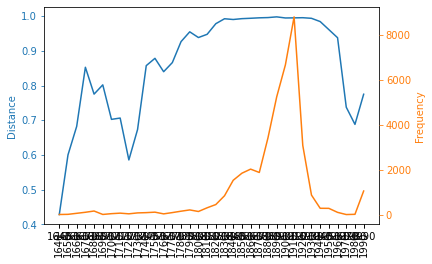

In [8]:
import matplotlib.pyplot as plt



fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax.plot(result.Decade, result.Cos, color="C0")
#ax.set_xlabel("Year", color="black")
ax.set_ylabel("Distance", color="C0")
#ax.tick_params(axis='x', colors="C0", )
ax.tick_params(axis='y', colors="C0")

ax2.plot(result.Decade, result.Freq, color="C1")
ax2.yaxis.tick_right()
#ax2.set_xlabel('Year', color="black") 
ax2.set_ylabel('Frequency', color="C1")       
#ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
#ax2.tick_params(axis='x', colors="C1")
ax2.tick_params(axis='y', colors="C1")
plt.xticks(rotation=90)
plt.show()

#fig=plt.figure()
#plt.close("all")
#plt.figure()
#plt.plot(figsize=(10,6))
#plt.plot(result.Decade, result.Cos, label="bear")
#plt.xticks(rotation=90)
#plt.legend()
#plt.show()